# MA934  Numerical Methods - Workbook 2

In [1]:
using PyPlot
include("KVPair.jl");
include("LList.jl");
include("FTree.jl");

In [2]:
# Seed for random number generator. 
seed = 5761;
# Initialise the random number generator
rng = MersenneTwister(seed);

## Question 1: Linear search using a linked list

The file KVPair.jl defines a simple data structure to represent an (Int64, Float64) key-value pair. 

The file LList.jl defines a linked list that stores a KVPair at each node. Many languages have a keyword NULL. A pointer to any object can take the value NULL to indicate that it doesn't point to anything. NULL is often used to denote the end of a list, the leaves of a tree etc. Julia does not support NULL pointers. This causes a difficulty in implementing recursive data structures. Instead Julia provides a parametric data type Nullable{T} to represent missing values. It is possible to use Nullable types to define recursive data structures although some of the resulting definitions are a bit clumsy. I'm not sure that this is the canonical way to implement structural recursion in Julia. 

The following points are important:

* if a variable has type Nullable{T} then it can either contain a value of type T or nothing (ie a missing value). 
* the function isnull(x) checks whether a nullable type x has a value or not. 
* the function get(x) returns the actual value (of type T) contained in a nullable type x.

Much more information can be found at https://docs.julialang.org/en/stable/manual/types/

The function 

> buildLList(dataArray::Array{KVPair, 1})

takes an array of KVPair objects as input and returns an LList containing these KVPairs. This is illustrated in the code below.

2. Write a function search(list::Nullable{LList}, k::Int64) that searches an LList for the key k and returns the corresponding KVPair if it is present and a Nullable{KVPair} otherwise. Verify that your function works.
3. Use Julia's @timed macro to measure how the typical computational cost of your search() function grows with the length of the list. 

** (1) ** Write a recursive function that traverses the list and prints out the key-value pairs stored in it. Check that your function works.

In [3]:
include("workbook2_search.jl");

The above file contains **two** functions: 
1. printKVPair(list) takes a LList, and print out the key-value pairs stored in it. 
2. search(list, k) takes a LList and the integer k, returns the corresponding KVPair if it is present and a Nullable{KVPair} otherwise. 

Regarding function, refer to printKVPair function in "workbook2.jl". We check the function as follows.

In [4]:
# construct KVPairs
X = convert(Array{Int64}, 1:10); 
n = length(X);
values = Array{KVPair}(n);
for i in 1:n
    values[i] = KVPair(i,X[i]);
end
# construct a list
L=buildLList(values);

In [5]:
# check whether the function works
printKVPair(L);

KVPair(1, 1.0)
KVPair(2, 2.0)
KVPair(3, 3.0)
KVPair(4, 4.0)
KVPair(5, 5.0)
KVPair(6, 6.0)
KVPair(7, 7.0)
KVPair(8, 8.0)
KVPair(9, 9.0)
KVPair(10, 10.0)


As can be observed from results, this function works because it prints out all the KVPairs.

** (2) ** Write a function search(list::Nullable{LList}, k::Int64) that searches an LList for the key k and returns the corresponding KVPair if it is present and a Nullable{KVPair} otherwise. Verify that your function works.

Regarding function, refer to  search function in "workbook2.jl". We check the function as follows.

In [6]:
# verify the function works
println(search(L,5));
println(search(L,11));

KVPair(5, 5.0)
Nullable{KVPair}


We checked two cases.

1. when the key is 5, it is present in the KVPairs, and we return the corresponding KVPairs.

2. when the key is 11, it is not present, and we return a Nullable{KVPairs}.

** (3) ** Use Julia's @timed macro to measure how the typical computational cost of your search() function grows with the length of the list. 

In the following we shall give the plot of runtime against the length of a list (1:100) on a lin-lin plot. To achieve this, for each length of list, say, $i$, we first assign the $j$th KVpair with key $j$ and an integer value randomly drawn from $0$ to $1$. Then the runtime is recorded through searching for a interger which does not belong to the list among the list so that we can go through all the elements and make results comparable.

In [7]:
# the length of the list
N=Int64(100)
# store the runtime of search function for arrays with different lengths
runtime=zeros(Float64,1,N);

for i=1:N
    # generate a list of length i
    X=rand(rng,i)
    values = Array{KVPair}(length(X));
    for j=1:length(X)
        values[j] = KVPair(j,X[j]);
    end
    L=buildLList(values);
    # search for a number among the list
    runtime[i]=(@timed search(L,length(X)))[2];
end

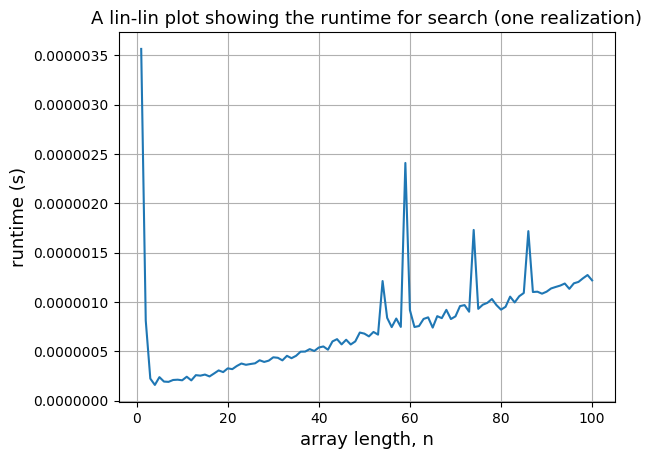

In [8]:
plot(1:N,runtime')
xlabel("array length, n",fontsize=13);
ylabel("runtime (s)",fontsize=13);
title("A lin-lin plot showing the runtime for search (one realization)",fontsize=13)
grid()
show()

For one realization, runtime is influenced by many factors and illustrates randomness; alternatively, we could now plot the average computational time of the function search. Here is the plot of average runtime against the length of a list (1:100) on a lin-lin plot.

In [9]:
# store runtime for arrays of different lengths and different realizations in an array
nreal=Int64(1000);
runtime=zeros(Float64,nreal,N);
for i=1:nreal
    for j=1:N
        X=rand(rng,j);
        values = Array{KVPair}(length(X));
        for k=1:length(X)
            values[k] = KVPair(k,X[k]);
        end
        L=buildLList(values);
        runtime[i,j]=(@timed search(L,length(X)))[2];
    end
end

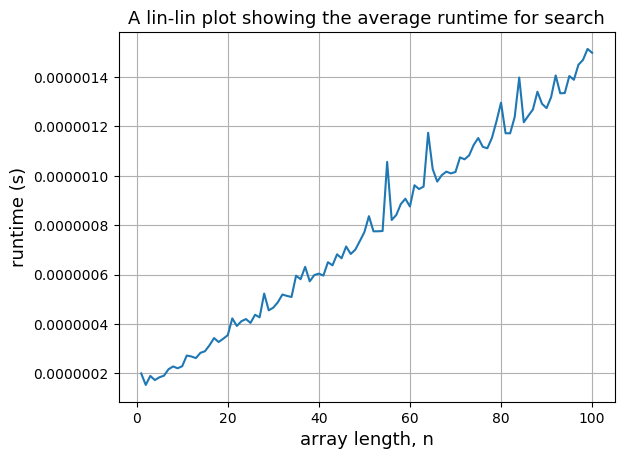

In [10]:
# plot the mean runtime for arrays with different lengths
plot(1:N,mean(runtime,1)')
xlabel("array length, n",fontsize=13);
ylabel("runtime (s)",fontsize=13);
title("A lin-lin plot showing the average runtime for search",fontsize=13)
grid()
show()

<font color=blue>
It is interesting to see that you verified that the fluctuations average out when you measure the time for lots of searches.
</font>

<font color=blue>
15/15
</font>

## Question 2: Interval membership

The problem of interval membership is the following: given a set of contiguous intervals, 

$\left\{[x_0, x_1), [x_1, x_2), \ldots, [x_{n-2}, x_{n-1}), [x_{n-1}, x_n)\right\}$

spanning the interval $[x_1, x_n)$ and given a random number $x \in [x_1, x_n)$, determine the interval in which $x$ lies. The standard numerical algorithm for stochastic simulation of continuous-time Markov processes (eg birth-death process, contact process, SIR model etc) requires solving an interval membership problem at each time step. It is therefore important to be able to solve it efficiently. Note, we cannot assume that all intervals are the same length.

We can solve the interval membership problem with $n$ interval by a variant of linear search in $O(n)$ time. We will demonstrate below that it can be solved in $O(\log\, n)$ time using a variant of a data structure known as a Fenwick tree.

**1)** Use Julia's random number generator to generate $n$ random interval lengths, $y_1, y_2, \ldots, y_n$ between 0 and 1 as shown: 

In [11]:
# Generate a sample of n uniform random numbers in the interval [0,1]
n=Int64(5);
Y = rand(rng, n);
#println(Y)

The corresponding interval membership problem is constructed from the partial sums:
$$x_i = \sum_{j=1}^i y_j, \ \ \ \ \ i=1,2,\ldots n.$$ 
Using the objects defined in KVPair.jl and LList.jl, create an array of key-value pairs, $(i, x_i)$, associating each interval with the corresponding partial sum and store this array in a linked list. Print the list for a small value of $n$to verify that it works.

In [12]:
# store the partial sum in a linked list
X=cumsum(Y);
values = Array{KVPair}(length(X));
for i in 1:length(X)
    values[i] = KVPair(i,X[i]);
end
L=buildLList(values);
# print the list for n=5
printKVPair(L);

KVPair(1, 0.5737096573512468)
KVPair(2, 1.0378056956050101)
KVPair(3, 1.7693755104392286)
KVPair(4, 2.4376045450934383)
KVPair(5, 3.4147481252775416)


As can be observed above, all the KVPairs can be accessible. Thus the code works.

**2)** Modify the search function you wrote above to write a recursive function

$$\text{intervalmembership(list::Nullable{LList}, x::Float64)}$$

that takes the LList containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as inputs and returns the KVPair corresponding to the interval in which $x$ lies. Verify that it works for small values of $n$ and use Julia's @timed macro to measure how the typical computational cost grows with $n$. 

In [13]:
include("workbook2_intervalmembership.jl");

The above file contains **two** functions: 
1. intervalmembership(list,x) takes the LList containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as inputs and returns the KVPair corresponding to the interval in which $x$ lies.

2. ftintervalmembership(ftree,x) takes the FTree containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as inputs and returns the KVPair corresponding to the interval in which $x$ lies.

See intervalmembership(list::Nullable{LList}, x::Float64) in "workbook2_intervalmembership.jl".

Verify that it works for small values of $n$.

In [14]:
# verify that it works for small values of n (use the list built in (1))
intervalmembership(L,1.5)

KVPair(3, 1.7693755104392286)

The function works because 1.5 lies in the 3rd interval and KVPair corresponding to the interval in which x lies is returned.

Use Julia's @timed macro to measure how the typical computational cost grows with $n$. 

The running time for searching the right range with different $n$ is recorded through the following code. For each different $n$, we assign $n$ KVPairs and search for the interval in which a number which is within the whole range lies. Corresponding running time is recorded for plot purpose. For one realiazation, the plot might fluctuate a lot. Maybe it is better for us to consider many realizations and then average the running time.

In [15]:
runtime=zeros(Float64,nreal,N)
for i=1:nreal
    for j=1:N
        Y=rand(rng, j)
        X=cumsum(Y)
        values = Array{KVPair}(length(X))
        for k=1:length(X)
            values[k] = KVPair(k,X[k])
        end
        L=buildLList(values)
        runtime[i,j]=(@timed intervalmembership(L,Float64(length(X))))[2]
    end
end

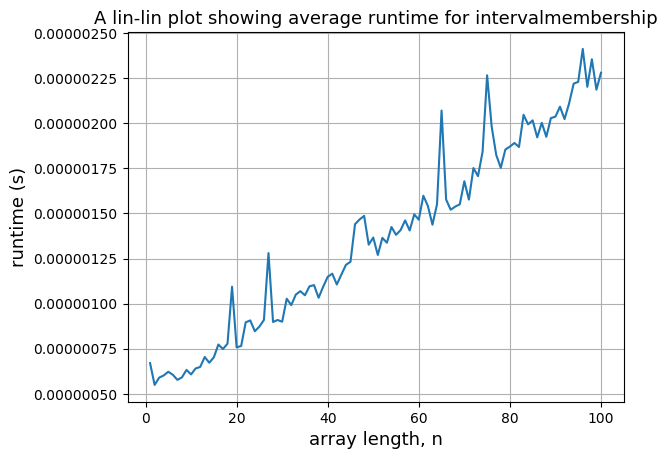

In [16]:
plot(1:N,mean(runtime,1)')
xlabel("array length, n",fontsize=13);
ylabel("runtime (s)",fontsize=13);
title("A lin-lin plot showing average runtime for intervalmembership",fontsize=13)
grid()
show()

The plot from averaging the running times is much smoother, and when array length is increasing, running times is growing. 

**3)** The file FTree.jl defines a data structure implementing a variant of a Fenwick tree that can solve the interval membership problem as described in the lectures/notes. The function 

$$\text{buildFTree(T::Nullable{FTree}, dataArray::Array{KVPair, 1})}$$

takes the array of KVPairs containing the interval lengths as input, recursively constructs the tree and returns the FTree containing the correct key-value pairs (note a key of -1 is assigned to all non-leaf nodes).

Write a recursive function

$$\text{ftintervalmembership(FT::Nullable{FTree}, x::Float64)}$$

that takes the FTree containing the list of partial sums and a random Float64 in the range $[0, x_n]$ as 
inputs and returns the KVPair corresponding to the interval in which $x$ lies. Verify that it works for small values of $n$ and use Julia's @timed macro to compare how the typical computational compares to the above linear search version. Note it can sometimes be difficult to directly measure $O(\log\, n)$ growth in computation time since the problem size needs to become very large to register appreciable run times.

Verify that it works for small values of $n$:

In [17]:
# verify that it works for small values of n=5.
values = Array{KVPair}(5)
for i in 1:n
    values[i] = KVPair(i,Y[i])
end
T = Nullable{FTree}(FTree(KVPair(0,0.0)))
T=buildFTree(T, values);
ftintervalmembership(T, 1.5)

KVPair(3, 0.37298788764463753)

The function works because 1.5 lies in the 3rd interval and KVPair corresponding to the interval in which x lies is returned.

Use Julia's @timed macro to compare how the typical computational compares to the above linear search version:

As explained above, the running time can be recorded for each array length. We could compare running time from both intervalmembership and ftintervalmembership functions. 

In [18]:
# compare how the typical computational compares to the above linear search version.
runtime1=zeros(nreal,N)
runtime2=zeros(nreal,N)
for i=1:nreal
    for j=1:N
        Y=rand(rng,j);
        X=cumsum(Y)
        
        values1 = Array{KVPair}(length(X))
        for k in 1:length(X)
            values1[k] = KVPair(k,X[k])
        end
        
        L=buildLList(values1)
        runtime1[i,j]=(@timed intervalmembership(L,Float64(length(X))))[2]
        
        
        values2 = Array{KVPair}(length(Y))
        for l=1:length(Y)
            values2[l] = KVPair(l,Y[l])
        end
        T=Nullable{FTree}(FTree(KVPair(0,0.0)))
        T=buildFTree(T, values2);
        runtime2[i,j]=(@timed ftintervalmembership(T,Float64(length(X))))[2];
    end
end


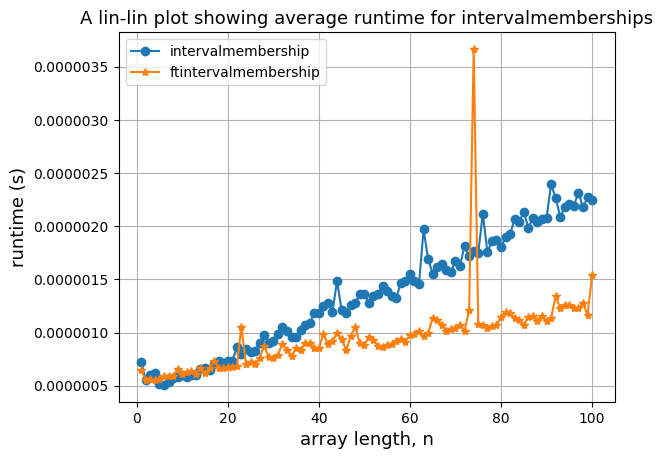

In [19]:
plot(1:100,mean(runtime1,1)',marker="o",markersize=6,label="intervalmembership")
plot(1:100,mean(runtime2,1)',marker="*",markersize=6,label="ftintervalmembership")
xlabel("array length, n",fontsize=13);
ylabel("runtime (s)",fontsize=13);
title("A lin-lin plot showing average runtime for intervalmemberships",fontsize=13)
legend()
grid()
show()

The plot illustrates that, for searching the right interval, ftintervalmembership, i.e., Fenwick tree method, is less time-consuming compared with linear search method.

<font color=blue>
To really see the difference between the two approaches you would need to look at much longer arrays. An array of length 100 is still quite small. When you get to 10000, the difference in performance should be huge. It would be harder to average over runs when the arrays get long though.
</font>

<font color=blue>
13/15
</font>

## Question 3: Gillespie algorithm for heterogeneous diffusion

The Gillespie algorithm is a dynamic Monte Carlo algorithm that generates statistically correct realisations of a continous time Markov process. See https://en.wikipedia.org/wiki/Gillespie_algorithm It is used heavily in stochastic simulation of chemical and biological reaction networks and population dynamics. In this question we use it to simulate one-dimensional diffusion of heterogeneous particles whose diffusion constants are independently drawn from an exponential distribution.

The basic idea of the algorithm is as follows
1. Create a list $\left\{(i, r_i), i=1,\ldots M\right\}$,  of all possible transitions (events), $i$, that can occur in the system and the corresponding transition rates, $r_i$.
2. Calculate the total rate
$$R = \sum_{i=1}^M r_i$$
and divide the interval $[0, R]$ into $M$ intervals whose lengths are given by the $r_i$.
3. Generate a uniform random number in the range $[0,R]$ and determine which interval it falls in. 
4. Perform the corresponding transition and update the time variable by an amount $\Delta t = 1/R$.
5. Repeat until the desired simulation time is reached.

To be concrete, suppose with have $N$ particles on the interval $[-L, L]$ initially located at $x=0$. Each particle can hop a distance $\Delta x$ to the left or to the right with equal probability. The rate of hopping is initially considered to be the same for all particles:

$$ r_i = \frac{D}{2}\,\frac{1}{(\Delta x)^2} $$

This choice ensures that in the continous limit ($\Delta x \to 0$, $N\to \infty$), the density of particles $c(x,t)$ on the line will satisfy the usual diffusion equation with diffusion coefficient $D$ (recall MA933):

$$ \frac{\partial c}{\partial t} = D \frac{\partial^2 c}{\partial x^2}$$

with initial condition $c(x,0) = \delta(x)$.

The steps of the algorithm then correspond to the following:
1. There are $M= 2 N$ possible transitions at each step: each of $N$ particles can hop a distance $\Delta x$ either left or right with the above rates. We index them as follows: events k=1:N correspond to particle k hopping to the right, events k=N+1:2N correspond to particle k-N hopping to the left.
2. The total rate is 
$$ R = \frac{D N}{(\Delta x)^2}.$$
3. Generate a uniform random number in the range $[0,R]$ and determine the index $k$ of particle to move and the direction.
4. Update the position of particle $k$ accordingly.
5. Repeat.

The following piece of code implements the Gillespie algorithm for N=100, L=10, $\Delta x = 0.1$ and $D=1$, converts the particle positions to particle density and compares to the solution of the diffusion equation on an unbounded domain at t=1 (we assume that L=10 is far enough from zero to be considered unbounded):

$$c(x, t) = \frac{1}{\sqrt{2 \pi D t}}\, \exp [-\frac{1}{2}\frac{x^2}{D t} ]$$

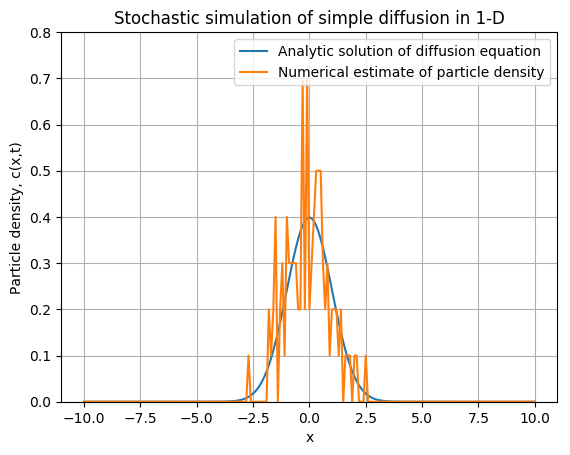

In [20]:
L=Float64(10.0)
N=Int64(100)
Nx = Int64(201)
dx = 2.0*L/(Nx-1)
X = dx.*(-(Nx-1)/2:(Nx-1)/2)
Y =zeros(Int64,N)
D = Float64(1.0)
t= Float64(0.0)

r = (D/2.0)/(dx*dx)
totalRate = 2.0*N*r
dt = 1.0/totalRate
T=Float64(1.0)

# This is the main loop
while t < T
    # Pick an event
    k = rand(1:2*N)
    if k<=N
        hop = 1
        particleId = k
    else
        hop = -1
        particleId=k-N
    end
    Y[particleId]+=hop
    t+=dt
end

# Calculate the estimated density of particles
P =zeros(Float64,length(X))
for i in 1:length(Y)
    P[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
end

# Calculate the theoretical density and compare
function normal(x, D, t)
    return (1.0/sqrt(2.0*pi*D*t))*exp(-x*x/(2*D*t))
end
P1 = normal.(X, D, T)
plot(X, P1, label="Analytic solution of diffusion equation")
plot(X, P, label="Numerical estimate of particle density")
xlabel("x")
ylabel("Particle density, c(x,t)")
title("Stochastic simulation of simple diffusion in 1-D")
ylim([0,0.8])
legend()
grid("on")

**1)** The code above makes critical use of the fact that all intervals have the same width in order to decide which particle to move at each step. Suppose now that instead of being equal to $D$ for each particle, the diffusion coefficients are drawn from an exponential distribution with mean $D$:

$$ P(x) = \frac{1}{D} \exp\left(-\frac{x}{D}\right). $$

Modify the code to account for this, using your code from Q2 above to solve the interval membership problem using linear search. You will need to use Julia's randexp() function to generate values for the diffusion coefficients. What is the largest value of $N$ you can simulate in a "reasonable" time?


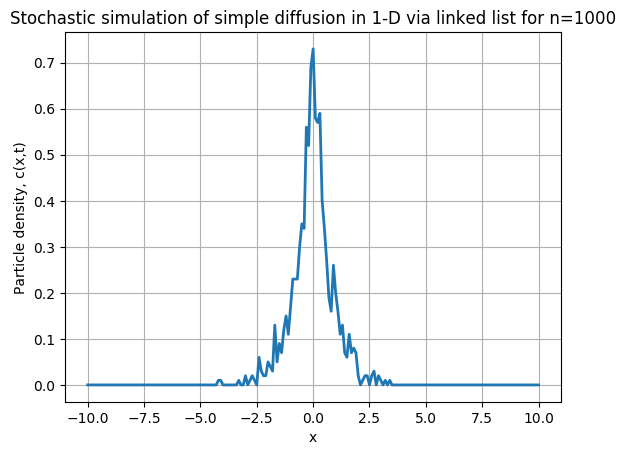

In [21]:
# change rates to be exponential
N = Int64(1000)
Y = zeros(Int64,N) 
D = randexp(Float64,N)
t = Float64(0.0)
b = (D/2.0)/(dx*dx)
r = [b;b] # rate
totalRate = sum(r)
dt = 1.0/totalRate

# Partial sum list for linear search
rcumsum=cumsum(r)
values = Array{KVPair}(length(rcumsum))
for i in 1:length(rcumsum)
        values[i] = KVPair(i,rcumsum[i])
end
L=buildLList(values)

# This is the main loop
while t < T
    # Pick an event
    urand=rand(1)*totalRate
    k= intervalmembership(L,urand[1])
    if k.key<=N
        hop = 1
        particleId=k.key
    else
        hop = -1
        particleId=k.key-N
    end
    Y[particleId]+=hop
    t+=dt
end

# Calculate the estimated density of particles
P =zeros(Float64,length(X))
for i in 1:length(Y)
    P[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx);
end

plot(X,P,linewidth=2)
xlabel("x")
ylabel("Particle density, c(x,t)")
title("Stochastic simulation of simple diffusion in 1-D via linked list for n=1000")
grid()
show()

When running the modified code with $N=100$ and $N=1000$, the results could be obtained whithin a short time; however, when running with N=$10000$, the results cannot be achevied in timely fashion.

**2)** Try again using your Fenwick tree from Q2 to solve the interval membership problem and compare. What is the largest value of $N$ you can simulate now?

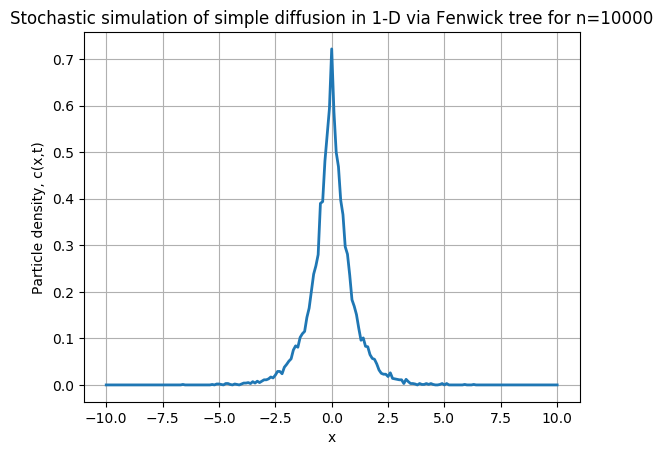

In [22]:
# change rates to be exponential
N=Int64(10000)
Y =zeros(Int64,N)
D = randexp(Float64,N)
t=Float64(0.0)
b = (D/2.0)/(dx*dx)
r = [b;b]
totalRate = sum(r)
dt = 1.0/totalRate


# build the Fenwick tree for Fenwick tree search
values = Array{KVPair}(length(r))
for i in 1:length(r)
    values[i] = KVPair(i,r[i])
end
FT = Nullable{FTree}(FTree(KVPair(0,0.0)))
FT = buildFTree(FT, values);


# This is the main loop
while t < T
    # Pick an event
    urand=rand(1)*totalRate
    k=ftintervalmembership(FT, urand[1])
    if k.key<=N
        hop = 1
        particleId=k.key
    else
        hop = -1
        particleId=k.key-N
    end
    Y[particleId]+=hop
    t+=dt
end


# Calculate the estimated density of particles
P1 =zeros(Float64,length(X))
for i in 1:length(Y)
    P1[Y[i]+Int64((Nx-1)/2)+1]+=1/(N * dx)
end

plot(X,P1,linewidth=2)
xlabel("x")
ylabel("Particle density, c(x,t)")
title("Stochastic simulation of simple diffusion in 1-D via Fenwick tree for n=10000")
grid()
show()

With  Fenwick tree incoroprated into the code, the results are obtained promptly even when $N=10000$; however, attemption with N=100000 will not return a quick answer.

**3)** Show analytically that the solution of the heterogenous diffusion problem is

$$ c(x,t) = \frac{\exp \left(-\sqrt{\frac{2}{D\,t}}\, |x| \right)}{\sqrt{2\, D\, t}}$$

You will probably need the integral formula (Formula 3.325 of Gradshteyn and Rizhik, 7th Ed.)

$$ \int_0^\infty \exp\left(-a\,x^2 - \frac{b}{x^2} \right)\, dx =  \frac{1}{2}\,\sqrt{\frac{\pi}{a}}\,\exp\left(-2 \sqrt{a\,b} \right).$$
Use this formula to validate your numerical results.



$\frac{\partial c}{\partial t}=D \frac{\partial^2 c}{\partial x^2}$ on $x\in [-L,L]$ as $N\rightarrow \infty$ where $c(x,t)=$density of particles at x and time t.

Note that $D \sim exp(D)$. Then taking expectation w.r.t. D yields
$$\langle c(x,t)\rangle = \big\langle\frac{1}{\sqrt{2\pi Dt}} \exp\big(-\frac{1}{2}\frac{x^2}{Dt}\big)\big\rangle = \int_{0}^{\infty} \frac{\exp(-\frac{y}{D})}{D} \frac{1}{\sqrt{2\pi yt}} \exp\big(-\frac{1}{2}\frac{x^2}{yt}\big) dy.$$ Now introducing a new variable $z=\sqrt{y}$, and substituting back into the integral yields
\begin{align*}
&\int_{0}^{\infty} \frac{\exp(-\frac{y}{D})}{D} \frac{1}{\sqrt{2\pi yt}} \exp(-\frac{1}{2}\frac{x^2}{yt}) dy=\int_{0}^{\infty} \frac{\exp(-\frac{z^2}{D})}{D} \frac{1}{z\sqrt{2\pi t}} \exp(-\frac{1}{2}\frac{x^2}{z^2t}) 2zdz\\
=&\frac{\sqrt{2}}{D\sqrt{\pi t}}\int_{0}^{\infty}\exp\big(-\frac{z^2}{D}-\frac{1}{2}\frac{x^2}{z^2t}\big) dz=\frac{\exp \left(-\sqrt{\frac{2}{D\,t}}\, |x| \right)}{\sqrt{2\, D\, t}},
\end{align*}
where the last equality follows from the integral formula provided above.



We could calculate the theoretical density as follows and then compare different simulations.

In [23]:
# calculate the theoretical density and compare
function diffusion(x, D, t)
    return exp(-sqrt(2.0/(D*t))*abs(x))/sqrt(2.0*D*t)
end
P2 = diffusion.(X, 1.0, T);

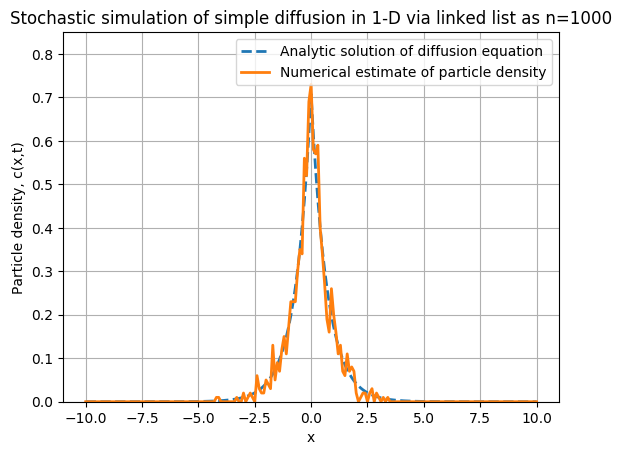

In [24]:
plot(X, P2 , linestyle="--",linewidth=2, label="Analytic solution of diffusion equation")
plot(X, P , linestyle="-",linewidth=2, label="Numerical estimate of particle density")
xlabel("x")
ylabel("Particle density, c(x,t)")
title("Stochastic simulation of simple diffusion in 1-D via linked list as n=1000")
ylim([0,0.85])
legend()
grid()
show()

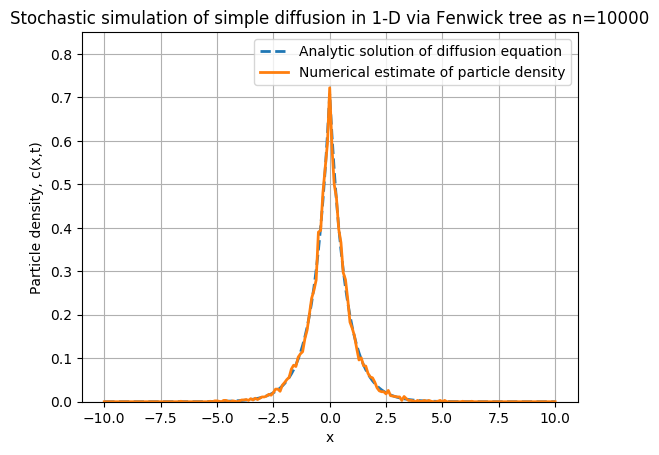

In [25]:
plot(X, P2, linestyle="--",linewidth=2, label="Analytic solution of diffusion equation")
plot(X, P1, linestyle="-",linewidth=2, label="Numerical estimate of particle density")
xlabel("x")
ylabel("Particle density, c(x,t)")
title("Stochastic simulation of simple diffusion in 1-D via Fenwick tree as n=10000")
ylim([0,0.85])
legend()
grid()
show()

From both plots we can see that, as $n$ grows, stochastic simulation is more closed to the true density curve. 

<font color=blue>
Excellent answer.
</font>

<font color=blue>
15/15
</font>